In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [4]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)
X_train=X_train/255.0
X_test=X_test/255.0


In [6]:
print("Shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


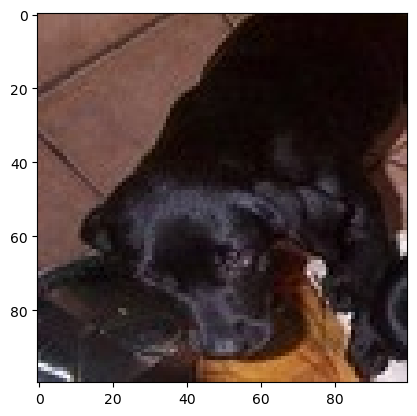

In [15]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

In [17]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1, activation='sigmoid')
    
])

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 11s 348ms/step - loss: 0.5517 - accuracy: 0.7095
Epoch 2/5
32/32 [==============================] - 11s 332ms/step - loss: 0.5215 - accuracy: 0.7465
Epoch 3/5
32/32 [==============================] - 11s 350ms/step - loss: 0.4667 - accuracy: 0.7870
Epoch 4/5
32/32 [==============================] - 11s 335ms/step - loss: 0.4329 - accuracy: 0.7975
Epoch 5/5
32/32 [==============================] - 11s 332ms/step - loss: 0.3987 - accuracy: 0.8270


In [22]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 41ms/step - loss: 0.5863 - accuracy: 0.7125


[0.5863138437271118, 0.7124999761581421]

# Making prediction

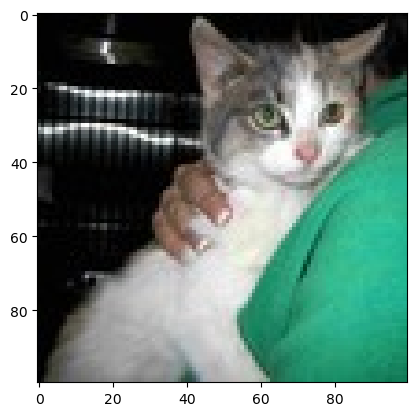

1/1 [==============================] - 0s 34ms/step
Our model prediction of the image is cat


In [26]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print(f"Our model prediction of the image is {pred}")